### Selenium을 이용한 이미지 크롤링 
- 유튜브 영상을 이미지로 크롤링 
- 특정 영역(element)을 자르기 
    - plooiw: python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유튜브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM 영역에만 띄워서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할 때 사용

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [12]:
url = "https://www.youtube.com/watch?v=cnXapYkboRQ&t=120s"
driver = webdriver.Chrome()
driver.get(url)

In [13]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [14]:
!ls datas

(풀빛)풀빛 핀두스의 아주 특별한 이야기 시리즈 전9권+워크북재정가세트.png
(쌀가게) (신세계의정부점)[2020년 햅쌀] 초정약수 참드림쌀 10kg .png
(모바일) [고래사x미미네] 어묵탕 + 떡볶이 콤보팩 670g x4팩.png
(깨비농원) 타이벡 조생 감귤 4.5kg 로얄소과(2S-M).png
10kg햇부사출시 가을홍사과.png
12%쿠폰 1+1 빅사이즈레깅스 5900원~기모팬츠치마.png
12%쿠폰 수맘 겨울 신상 수면 기모 홈웨어 잠옷 세트.png
12%쿠폰 가을 가디건 니트 롱 가디건 조끼.png
12%쿠폰~융털기모모직 팬츠트레이닝빅사이즈~4XL.png
20FW ODV 클라우드 기모니트티 4종.png
3만원인하 키스해링 20FW 팝아트 데님 3종.png
DIY 나만의 마스크 목걸이 스트랩 만들기 3종세트.png
EXR 아우터 외 트랙수트티셔츠팬츠.png
I Can Read Level MF단계 ~ 3.4단계 (Book+Audio CD 포함 Set) 선택구매.png
JYBOOKS DK EFE + My First Dictionary (전2종).png
KF94 국산 순풍 마스크 50매 식약처인증 의약외품.png
KF94 황사 마스크 대형 국산 개별 포장 100매 국산자재.png
NEW땡큐 화장지 (30롤 x 2팩)  3겹 두루마리 휴지.png
Percussive 마사지건 국내220v 해드 4개.png
[+본품용량]에스쁘아 워터스플래쉬 선크림SPF50+PA+++60ML.png
[BCBG](대구신세계) S 아미구스다운(B0S1F870).png
[BYC]BYC외 기모 발열 내복 내의 상하 남자 남성 여자 여성.png
[BYO]CJ BYO 20억 생유산균 30포 x 3개 (총90포)+사은품.png
[HP]HP A4 복사용지(A4용지) 75g 2500매 2BOX더블에이.png
[HP]HP A4 복사용지(A4용지) 80g 2500매 2BOX더블에이.png
[니]NII 아동 FW 맨투맨점퍼외50종+최대22%추가할인.png
[비타500]비타500 100ml x 50

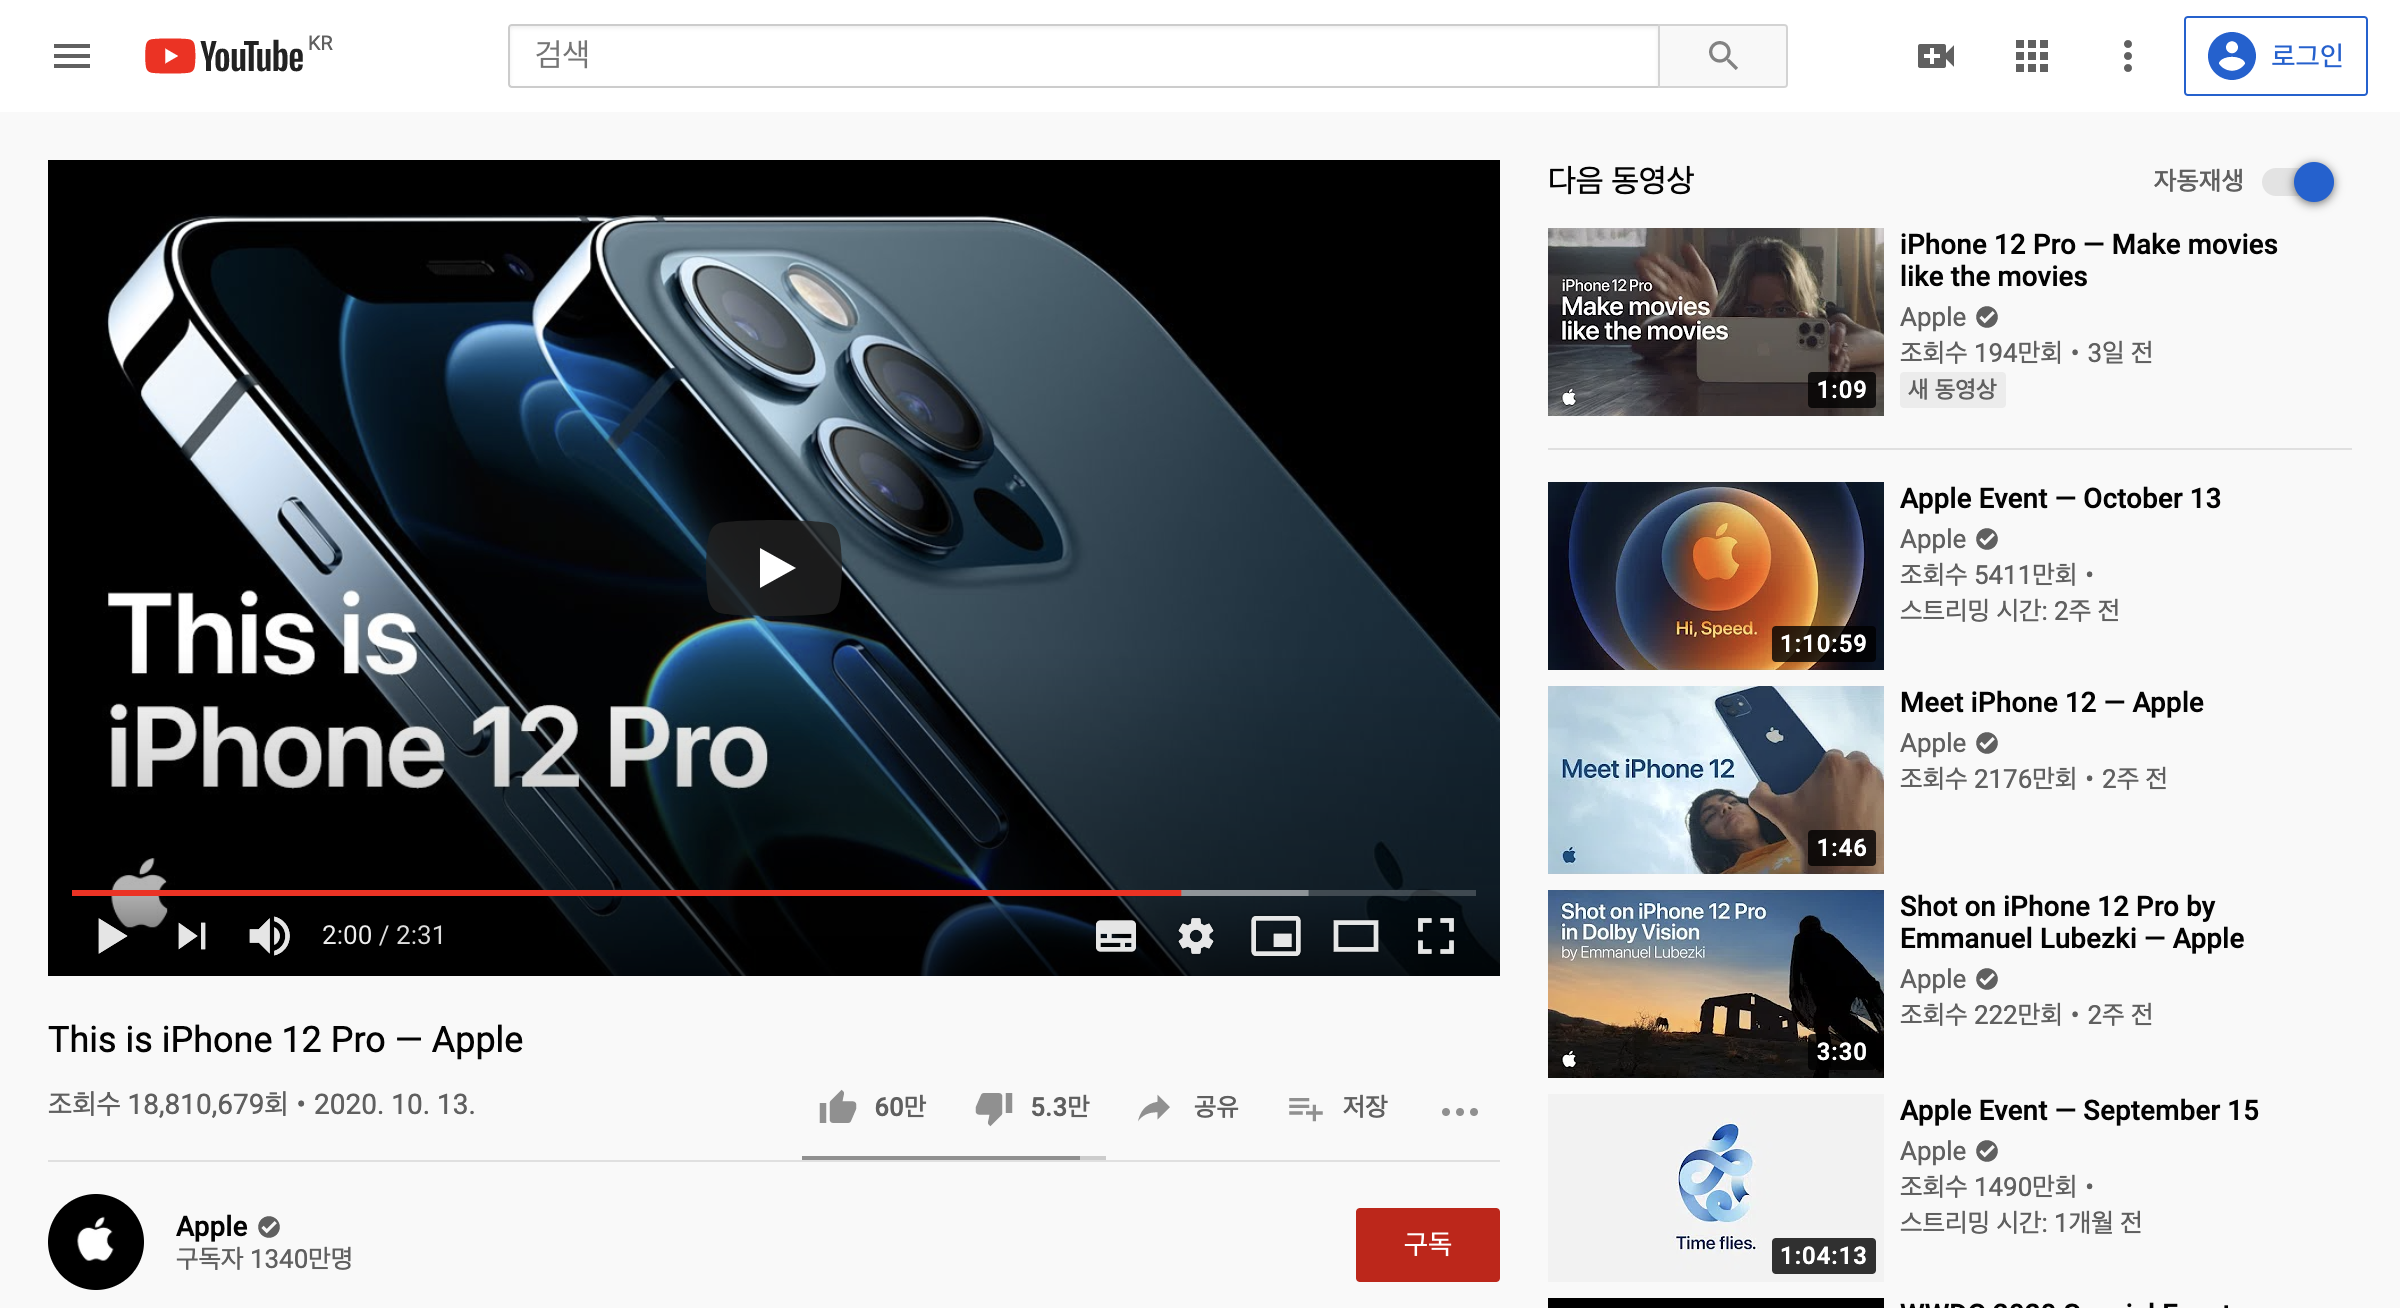

In [15]:
pil_img = pil.open("datas/screenshot.png")
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [16]:
url = "https://www.youtube.com/watch?v=cnXapYkboRQ&t=120s"
driver = webdriver.Chrome()
driver.get(url)

In [17]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 286, 'width': 509}


In [28]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰줘야 합니다.
left = location["x"] * 2.8
top = location["y"]*2.8
right = left + size["width"]*2.8
bottom = top + size["height"]*2.8
area = (left, top, right, bottom)
area

(67.19999999999999, 224.0, 1492.3999999999999, 1024.8)

#### 3. 이미지를 pillow로 잘라주기

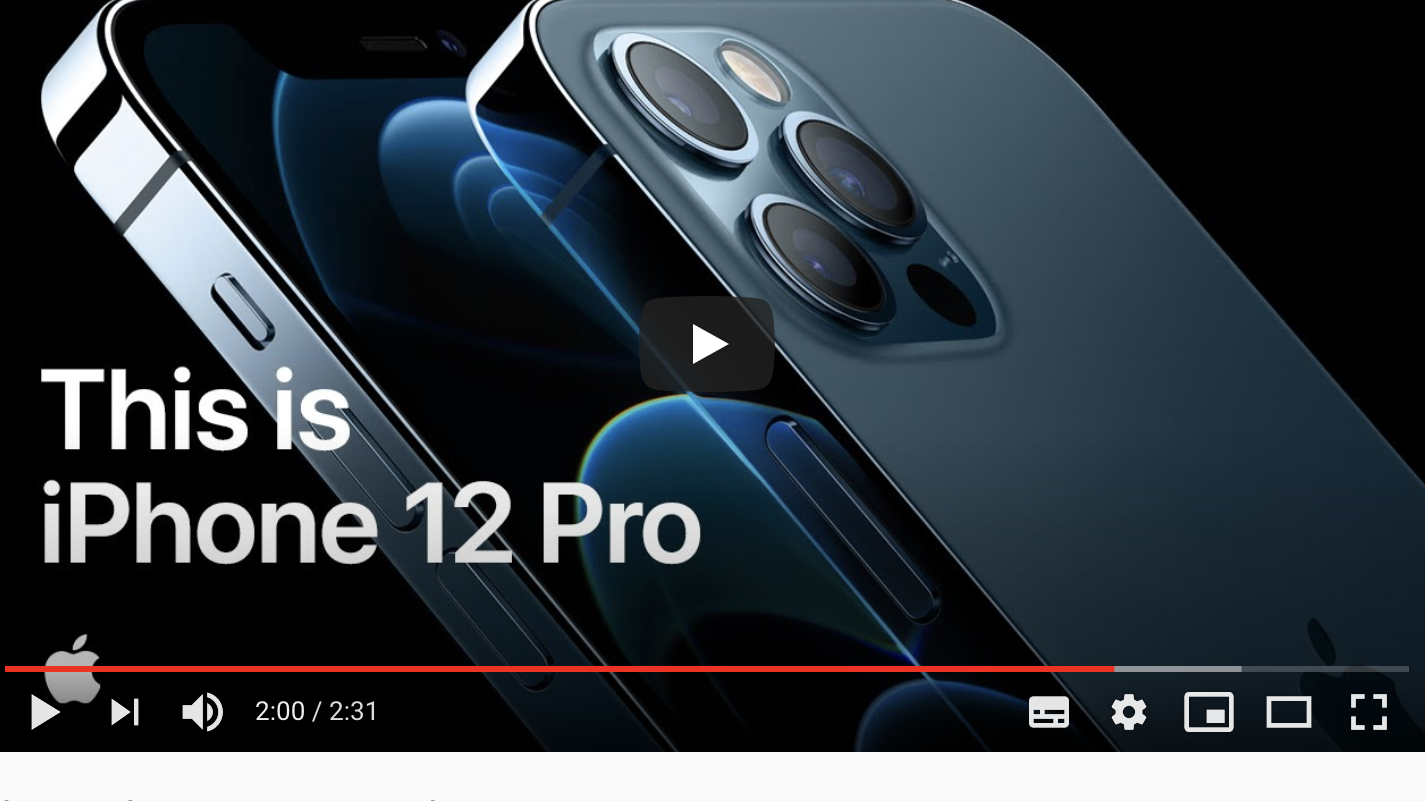

In [29]:
pil_element_img = pil_img.crop(area)
pil_element_img

##### 이미지 저장
pil_element_img.save("datas/screeshot_element.png")

In [31]:
!ls datas

(풀빛)풀빛 핀두스의 아주 특별한 이야기 시리즈 전9권+워크북재정가세트.png
(쌀가게) (신세계의정부점)[2020년 햅쌀] 초정약수 참드림쌀 10kg .png
(모바일) [고래사x미미네] 어묵탕 + 떡볶이 콤보팩 670g x4팩.png
(깨비농원) 타이벡 조생 감귤 4.5kg 로얄소과(2S-M).png
10kg햇부사출시 가을홍사과.png
12%쿠폰 1+1 빅사이즈레깅스 5900원~기모팬츠치마.png
12%쿠폰 수맘 겨울 신상 수면 기모 홈웨어 잠옷 세트.png
12%쿠폰 가을 가디건 니트 롱 가디건 조끼.png
12%쿠폰~융털기모모직 팬츠트레이닝빅사이즈~4XL.png
20FW ODV 클라우드 기모니트티 4종.png
3만원인하 키스해링 20FW 팝아트 데님 3종.png
DIY 나만의 마스크 목걸이 스트랩 만들기 3종세트.png
EXR 아우터 외 트랙수트티셔츠팬츠.png
I Can Read Level MF단계 ~ 3.4단계 (Book+Audio CD 포함 Set) 선택구매.png
JYBOOKS DK EFE + My First Dictionary (전2종).png
KF94 국산 순풍 마스크 50매 식약처인증 의약외품.png
KF94 황사 마스크 대형 국산 개별 포장 100매 국산자재.png
NEW땡큐 화장지 (30롤 x 2팩)  3겹 두루마리 휴지.png
Percussive 마사지건 국내220v 해드 4개.png
[+본품용량]에스쁘아 워터스플래쉬 선크림SPF50+PA+++60ML.png
[BCBG](대구신세계) S 아미구스다운(B0S1F870).png
[BYC]BYC외 기모 발열 내복 내의 상하 남자 남성 여자 여성.png
[BYO]CJ BYO 20억 생유산균 30포 x 3개 (총90포)+사은품.png
[HP]HP A4 복사용지(A4용지) 75g 2500매 2BOX더블에이.png
[HP]HP A4 복사용지(A4용지) 80g 2500매 2BOX더블에이.png
[니]NII 아동 FW 맨투맨점퍼외50종+최대22%추가할인.png
[비타500]비타500 100ml x 50

#### 썸네일 만들기
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [32]:
pil_element_img.size

(1425, 801)

<PIL.Image.Image image mode=RGBA size=285x160 at 0x7FE863E67040>


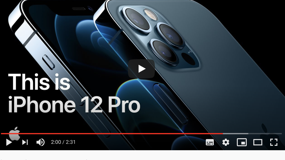

In [34]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img)
pil_element_img

### fake useragent

In [35]:
from fake_useragent import UserAgent

In [38]:
# 크롬 드라이버의 Agent확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36


In [44]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36


#### Headless
- 브라우저를 화면에 띄우지 않고 메모리 상에서만 실행하는 방법
- 크롬 60 버전 이상에서만 사용이 가능 
- window 화면이 지원되지 않는 환경에서 사용

In [45]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


#### 영상파일다운로드
- www. -> ss로 변경하면 다운로드 받을 수 있는 사이트에 접속

In [66]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [67]:
url = 'https://www.youtube.com/watch?v=yKEFo1A4y1E'

In [68]:
link = "https://r4---sn-5goeen7d.googlevideo.com/videoplayback?expire=1604037698&ei=4lebX4rYLprU7gST0qjIDg&ip=185.147.213.26&id=c8a105a35038cb51&itag=22&source=youtube&requiressl=yes&mh=JZ&mm=31%2C26&mn=sn-5goeen7d%2Csn-bg0eznek&ms=au%2Conr&mv=m&mvi=4&pl=24&initcwndbps=3456250&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=38.103&lmt=1603800887387987&mt=1604016046&fvip=4&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAJI3xs56pPteJ_3nd_KpCqDGTpW59DUzyNpRn40s5O2MAiEAl3JvUXjX3ov4FUpVtQmKlLBmsLlHqKiHN6gPPp3uEGc%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIhAJJ1uv9TnKVdWi3snKTEkat597_CqTv9iS0ZuoHePX6nAiB1iB4IQ1-g0pZCc6PXtBZFnPWLNoBhbm9weVcqE2EB0w%3D%3D&title=%EC%97%AD%EB%8C%80%20%EC%B5%9C%EA%B0%95%EC%9D%98%20iPhone"

In [69]:
title = "Apple_September_Event_2020.mp4"
size = download(title, link)
print("{} Mb".format(round(size/1024/1024,2)))

2.47 Mb
